In [1]:
import numpy as np
import math
import random
import heapq
import matplotlib.pyplot as plt

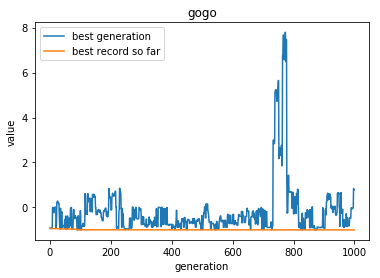

x= 3.213 y= 0.823 best_ans= -0.9990125029256544


In [2]:
####生成list
a =[]                       #置放五個list的容器
best_target = float('inf')  #初始的最好適性函數 = 無限大
it = 0                      #迭代數
btl=[]                      #best target list(最好的適性函數)
gtl = []                    #good target list(每代5個list中最好的適性函數)
while len(a) !=5:           #生成五個list(染色體) 
    for i in range(5):
        b=[]
        for j in range(23):
            r =random.randint(0,1) 
            b.append(r)
        str1 = ''.join(str(e) for e in b)
        realx = round((2+ ((eval("0b"+"".join(str1[:11])))*2)/((2**11)-1)),3)
        realy = round((-1+ ((eval("0b"+"".join(str1[11:])))*3)/((2**12)-1)),3)
        if realx+realy<3:
            a = []
            break
        a.append(b)

while it< 1000:             #重複做1000次
    target = []             #每個list的適性函數
    good_target = []        #好的list的適性函數
    best_a =[]              #2個好的list
   
     
    zz = []                 #轉換用
####計算適性函數gg
    for i in a :
        str1 = ''.join(str(e) for e in i)
        realx = round((2+ ((eval("0b"+"".join(str1[:11])))*2)/((2**11)-1)),3)  #將list拆開轉換成x
        realy = round((-1+ ((eval("0b"+"".join(str1[11:])))*3)/((2**12)-1)),3) #將list拆開轉換成y
        str1 = ''.join(str(e) for e in i)
        gg=(realy- 1)**4-(math.sin(5*math.pi*(realx**(3/4)-0.1))**2)           #將x,y代進適性函數公式(變數)得出適性函數
        target.append(gg)
        if best_target>gg:                                                     #如果這代適性函數好於前幾代，更新
            brx = realx
            bry = realy
####找出好的list
    min_num_index_list = map(target.index, heapq.nsmallest(2, target)) 
####好list的位置
    see = list(min_num_index_list)

    for i in see:
        best_a.append(a[i])
#### target = 剩下三個的適性函數   
    for i in range(2):
        mimi = min(target)
        good_target.append(mimi)
        target.remove(mimi)
####存儲每代最佳
    gtl.append(min(good_target))
    best_target = min(min(good_target),best_target)
    btl.append(best_target)
####交配Crossover = cr
    cr = random.uniform(0,1)
    new_a1 = a[see[0]]
    new_a2 = a[see[1]]

    if cr < 0.9:
        o = random.randint(0,22)
        new_a1 = ''.join(str(e) for e in best_a[0])
        new_a2 = ''.join(str(e) for e in best_a[1])
        new_a3 = new_a2[:o]+new_a1[o:]
        new_a4 = new_a1[:o]+new_a2[o:]
        new_a1 =list(new_a3)
        new_a2 =list(new_a4)

####Mutation = mu
    mu1 = random.uniform(0,1)
    o1= random.randint(0,22)
    mu2 = random.uniform(0,1)
    o2= random.randint(0,22)
   
  
    
####fake_list = 除了好list之外的list的位置
    fake_list = [0,1,2,3,4]
    for i in see:
        fake_list.remove(i)

    if mu1>0.9:
        new_a1[o1] = 1 if new_a1[o1] == "0" else 0
    new_a1 = ''.join(str(e) for e in new_a1)
    if mu2>0.9:
        new_a2[o2] = 1 if new_a1[o2] == "0" else 0
    new_a2 = ''.join(str(e) for e in new_a2)
    for i in fake_list:
        mu3 = random.uniform(0,1)
        if mu3>0.9:
            o3= random.randint(0,22)
            a[i][o3] = 1 if new_a1[o3] == "0" else 0
        a[i] = ''.join(str(e) for e in a[i])
#####iteration

    a[see[0]] = new_a1  
    a[see[1]] = new_a2
    it+=1
    for i in a :
        z = []
        for j in i :
            j =int(j)
            z.append(j)
        zz.append(z)
        a = zz
plt.figure()
plt.title("gogo")
plt.plot([i for i in range(1000)],gtl,label = "best generation")
plt.plot([i for i in range(1000)],btl,label = "best record so far")
plt.xlabel("generation")
plt.ylabel("value")
plt.legend(loc = "best")
plt.show()
print("x=",brx,"y=",bry,"best_ans=",min(btl))